# Open Government Data, Canton Zurich

### **Dataset**: Lernende auf Sekundarstufe I im Kanton Zürich ab 2000

### **Description**: Schüler/innen auf Sekundarstufe I an öffentlich finanzierten Schulen im Kanton Zürich.

Die Daten werden jährlich für den Stichtag 15.9. erhoben.

*Autogenerated Jupyter Notebook and basic Python code for data set* **1583@bildungsstatistik-kanton-zuerich**.

## Dataset profile
- **Issued** `2022-10-24T11:50:08`
- **Modified** `2022-12-07T14:06:00`
- **Startdate** `2000-09-15`
- **Enddate** `2021-09-15`
- **Theme** `['Bildung, Wissenschaft']`
- **Keyword** `['ausbildung', 'bildung', 'bildungsstufe', 'lernende', 'schueler', 'schuelerinnen', 'schulgemeinden', 'sekundarschule', 'sekundarstufe', 'bildungsdaten', 'ogd']`
- **Publisher** `['Bildungsstatistik des Kantons Zürich']`
- **Landingpage** `None`


## Import Python modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }

plt.rcParams.update(params)

import pandas as pd 

## Load data

- The dataset has **`1` distribution(s)** in CSV format.
- All available CSV distributions are listed below and can be read into a pandas dataframe.

In [2]:
# Distribution 0
# Ktzhdistid               : 3021
# Title                    : Lernende auf Sekundarstufe I im Kanton Zürich ab 2000
# Description              : Die Daten sind differenziert nach Jahr, zuständiger Schulgemeinde und Sek-Anforderungstyp. Bei Zellen kleiner 5 wird nur der Wert "1-5" ausgewiesen. Jahr: Das Jahr ist jeweils das Kalenderjahr der Erhebung, wobei der Stichtag der 15.9. ist. Die Daten für das Jahr 2021 sind somit im Schuljahr 2021/22 erhoben worden und zeigen den Datenstand am 15. September 2021. Schulgemeinde: Hier wir die zuständige Schulgemeinde dargestellt. Das ist üblicherweise die Schulgemeinde des Wohnort. Es entspricht aber nicht in jedem Fall der Schulgemeinde des Schulstandorts der effektiv besucht wird. Anforderungstyp: In absteigender Reihenfolge sind dies: Mittelschule, Sekundarschule A, Sekundarschule B, Sekundarschule C, besondere Klassen, Heim-/Sonderschulung. Anzahl: Anzahl der Schülerinnen und Schüler mit der entsprechenden Merkmalskombination.
# Issued                   : 2022-10-24T11:50:08
# Modified                 : 2022-12-07T14:06:00
# Rights                   : NonCommercialAllowed-CommercialAllowed-ReferenceRequired

df = pd.read_csv('https://www.web.statistik.zh.ch/ogd/data/bista/ZH_Lernende_Sekundarstufe_I_Anforderungstyp.csv', on_bad_lines='warn', encoding_errors='ignore')
if df.shape[1] <= 1:
    df = pd.read_csv('https://www.web.statistik.zh.ch/ogd/data/bista/ZH_Lernende_Sekundarstufe_I_Anforderungstyp.csv', sep=';', on_bad_lines='warn', encoding_errors='ignore')

## Analyze data

In [3]:
# drop columns that have no values
df.dropna(how='all', axis=1, inplace=True)

In [4]:
print(f'The dataset has {df.shape[0]:,.0f} rows (observations) and {df.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {df.duplicated().sum()} exact duplicates in the data.')

The dataset has 11,824 rows (observations) and 6 columns (variables).
There seem to be 0 exact duplicates in the data.


In [5]:
df.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Stand            11824 non-null  object
 1   Kanton           11824 non-null  object
 2   Jahr             11824 non-null  int64 
 3   Schulgemeinde    11819 non-null  object
 4   Anforderungstyp  11824 non-null  object
 5   Anzahl           11824 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.8 MB


In [6]:
df.head()

,Stand,Kanton,Jahr,Schulgemeinde,Anforderungstyp,Anzahl
0,2022-12-07,zh,2021,Adliswil,Heim-/Sonderschulung,1 bis 5
1,2022-12-07,zh,2021,Adliswil,Mittelschule,118
2,2022-12-07,zh,2021,Adliswil,Sek A,206
3,2022-12-07,zh,2021,Adliswil,Sek B,121
4,2022-12-07,zh,2021,Adliswil,Sek C,32


In [7]:
# display a small random sample transposed in order to see all variables
df.sample(3).T

,10129,1896,5604
Stand,2022-12-07,2022-12-07,2022-12-07
Kanton,zh,zh,zh
Jahr,2003,2018,2011
Schulgemeinde,Zollikon,Schlieren,Regensdorf-Buchs-Dällikon
Anforderungstyp,Sek A,Mittelschule,Sek A
Anzahl,103,29,323


In [8]:
# describe non-numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(exclude='number'))

,Stand,Kanton,Schulgemeinde,Anforderungstyp,Anzahl
count,11824,11824,11819,11824,11824
unique,1,1,153,6,504
top,2022-12-07,zh,Dübendorf-Schwerzenbach,Mittelschule,1 bis 5
freq,11824,11824,130,2658,2160


In [9]:
# describe numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(include='number'))

,Jahr
count,"11,824.00"
mean,"2,010.39"
std,6.33
min,"2,000.00"
25%,"2,005.00"
50%,"2,010.00"
75%,"2,016.00"
max,"2,021.00"


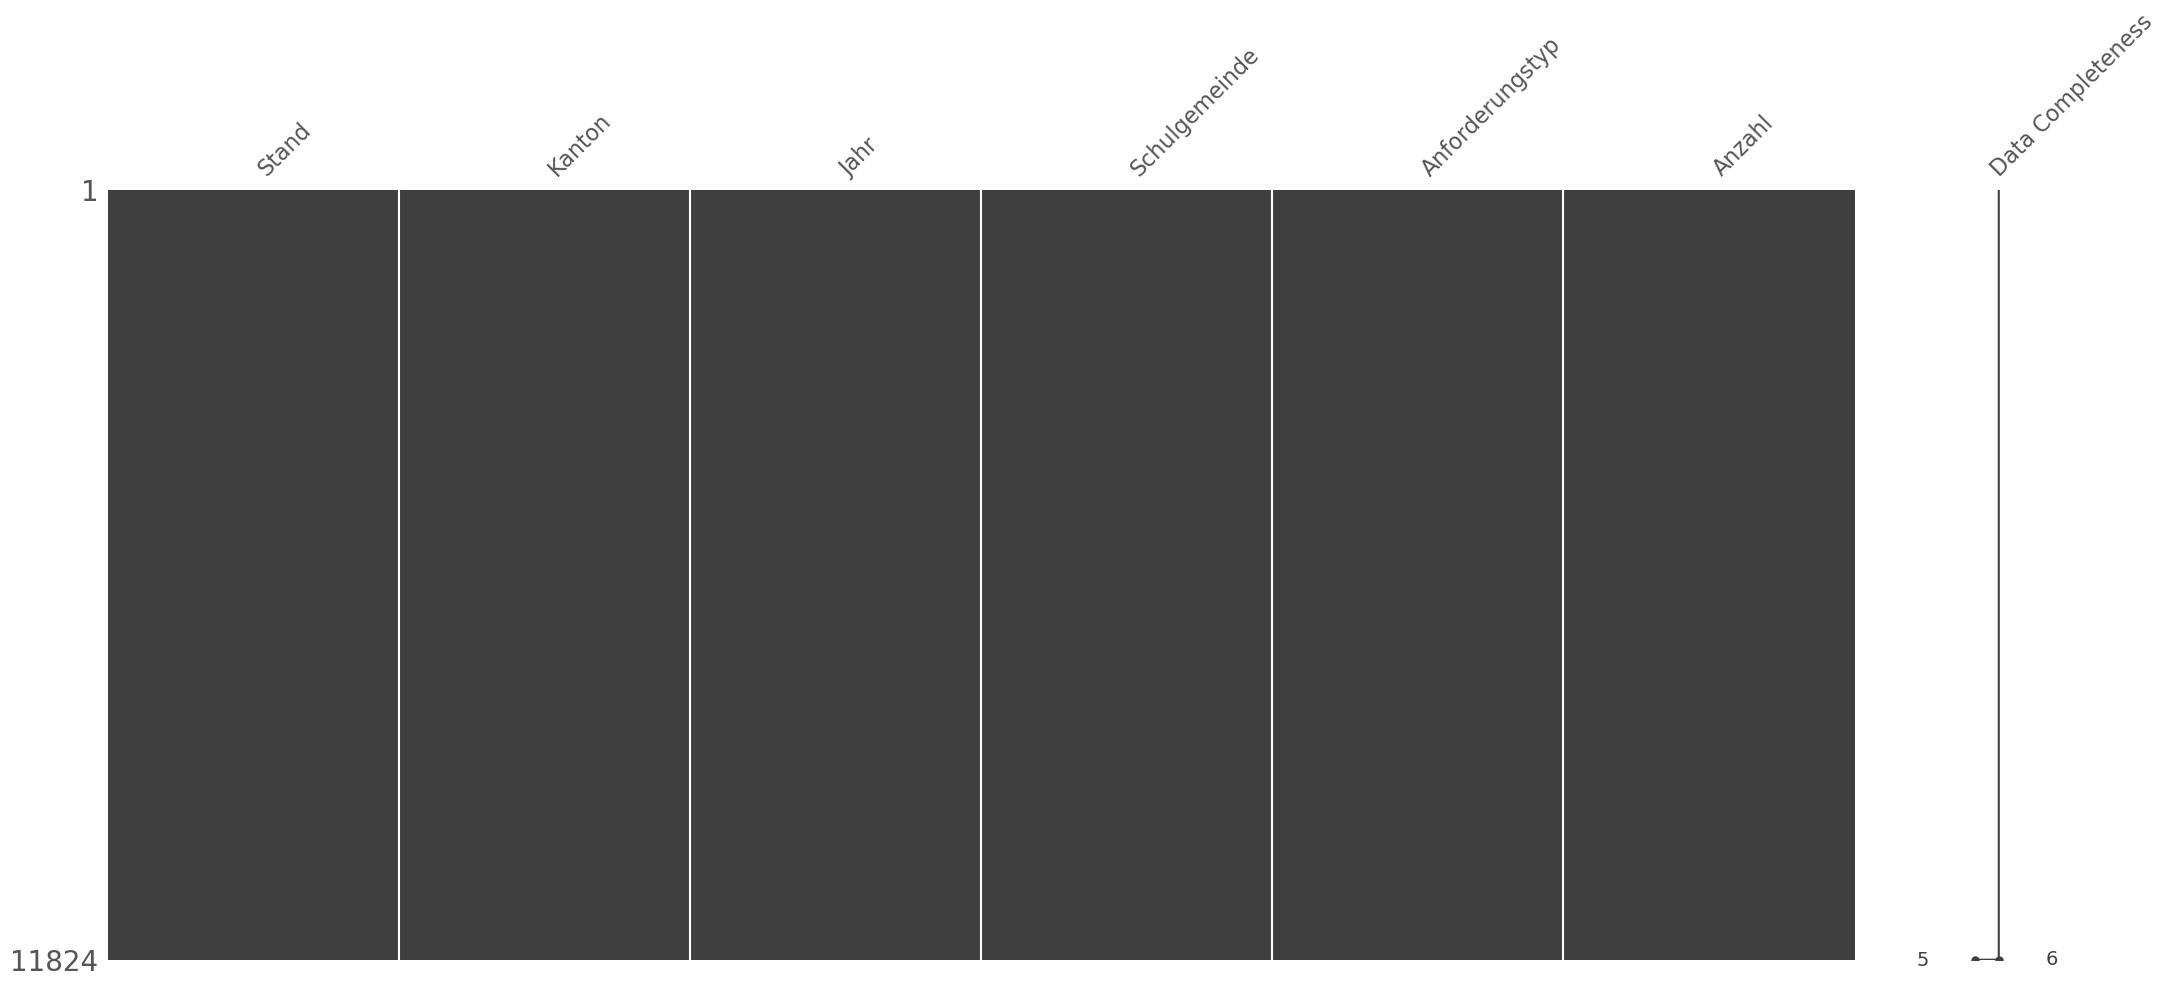

In [10]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending');

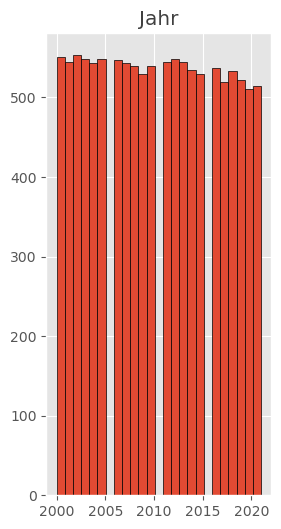

In [11]:
# plot a histogram for each numerical feature
df.hist(bins=25, layout=(-1, 5), edgecolor='black');

In [12]:
# continue your code here...

**Contact**: Bildungsstatistik des Kantons Zürich |  | bista@bi.zh.ch